In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns

import librosa
import librosa.display


In [10]:
JSON_DIR = "../data/01_raw/1_boubakiki_mono"
EXP_DIR = "../data/03_report/"
Path(EXP_DIR).mkdir(exist_ok=True, parents=True)

In [5]:
json_paths = list(Path(JSON_DIR).glob("*.json"))
json_paths = [str(p) for p in json_paths]
json_paths.sort()
json_paths

['../data/01_raw/1_boubakiki_mono/1_bouba_woman.mono.json',
 '../data/01_raw/1_boubakiki_mono/2_kiki_woman.mono.json',
 '../data/01_raw/1_boubakiki_mono/3_bouba_like_kiki_woman.mono.json',
 '../data/01_raw/1_boubakiki_mono/4_kiki_like_bouba_woman.mono.json',
 '../data/01_raw/1_boubakiki_mono/5_bouba_man.mono.json',
 '../data/01_raw/1_boubakiki_mono/6_kiki_man.mono.json',
 '../data/01_raw/1_boubakiki_mono/7_bouba_like_kiki_man.mono.json',
 '../data/01_raw/1_boubakiki_mono/8_kiki_like_bouba_man.mono.json']

In [6]:
import json
def load_f_json(json_path):
    with open(json_path, mode='rt', encoding='utf-8') as fp:
        data = json.load(fp)
    return data

load_f_json(json_paths[0])

{'wav_path': '../data/01_raw/1_boubakiki_mono/1_bouba_woman.mono.wav',
 'loudness': 0.11769886984768958,
 'sharpness': 0.1018109135934373,
 'roughness': 0.00018512843636952266}

In [7]:
buf = []
for json_path in json_paths:
    data = load_f_json(json_path)
    buf.append(data)


In [20]:
df_data = pd.DataFrame(buf)

df_data["wav_name"] = df_data["wav_path"].apply(lambda x: Path(x).stem.split(".")[0])
df_data["wav_no"] = df_data["wav_name"].apply(lambda x: x[0]).astype(int)
df_data = df_data.sort_values(["wav_no"])

df_data.to_csv(Path(EXP_DIR) / "df_data.csv", index=None)

del df_data

In [21]:
df_data = pd.read_csv(Path(EXP_DIR) / "df_data.csv")
df_data

,wav_path,loudness,sharpness,roughness,wav_name,wav_no
0,../data/01_raw/1_boubakiki_mono/1_bouba_woman....,0.117699,0.101811,0.000185,1_bouba_woman,1
1,../data/01_raw/1_boubakiki_mono/2_kiki_woman.m...,0.081413,0.166820,0.000646,2_kiki_woman,2
2,../data/01_raw/1_boubakiki_mono/3_bouba_like_k...,0.146244,0.439330,0.000675,3_bouba_like_kiki_woman,3
3,../data/01_raw/1_boubakiki_mono/4_kiki_like_bo...,0.096236,0.189378,0.000034,4_kiki_like_bouba_woman,4
4,../data/01_raw/1_boubakiki_mono/5_bouba_man.mo...,0.335096,0.241094,0.002297,5_bouba_man,5
5,../data/01_raw/1_boubakiki_mono/6_kiki_man.mon...,0.167350,0.365674,0.000483,6_kiki_man,6
6,../data/01_raw/1_boubakiki_mono/7_bouba_like_k...,0.558744,0.778420,0.008420,7_bouba_like_kiki_man,7
7,../data/01_raw/1_boubakiki_mono/8_kiki_like_bo...,0.250788,0.514829,0.004370,8_kiki_like_bouba_man,8


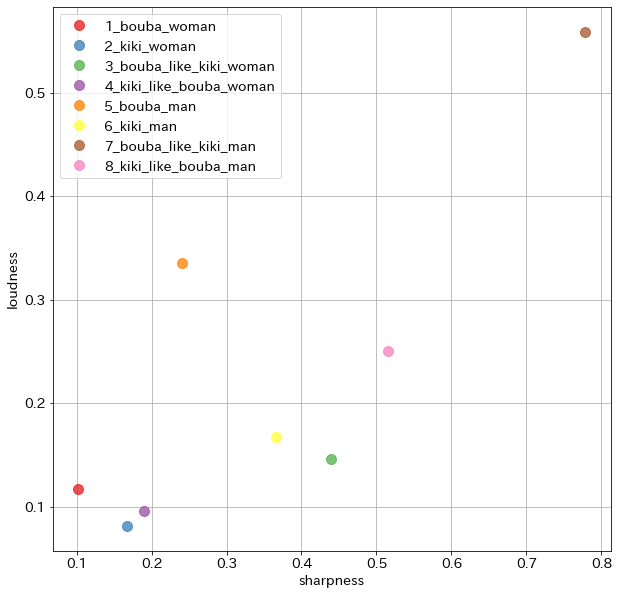

In [24]:
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

y_feature = "loudness"
x_feature = "sharpness"
cat_feature = "wav_name"

plt.rcParams["font.size"] = 14

dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)
    plt.legend()
    
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



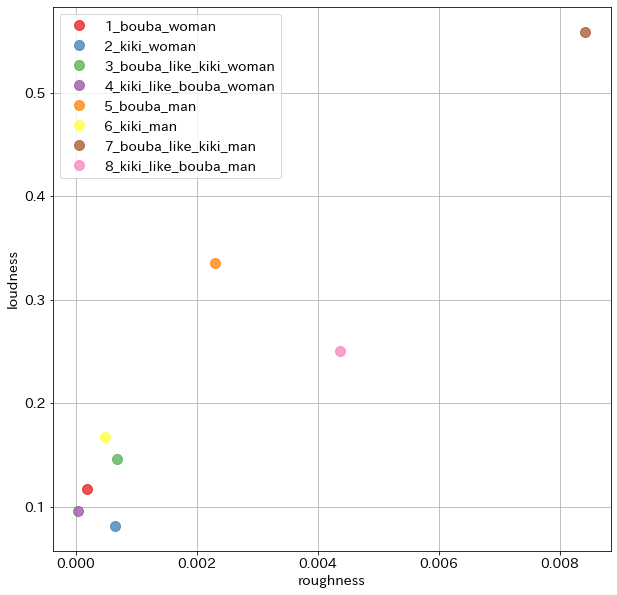

In [25]:
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

y_feature = "loudness"
x_feature = "roughness"
cat_feature = "wav_name"

plt.rcParams["font.size"] = 14

dfp = df_data.copy()


fig, ax = plt.subplots(figsize=(10, 10))
cats = dfp[cat_feature].unique()
for i, cat in enumerate(cats[:]):
    df1 = dfp.query(f"{cat_feature} == @cat")
    x = df1[x_feature]
    y = df1[y_feature]
    
    c = colorlist[i]
    
    plt.plot(x, y , "o", markersize=10, color=c, label=cat, alpha=0.75)
    plt.legend()
    
plt.ylabel(y_feature)
plt.xlabel(x_feature)
plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



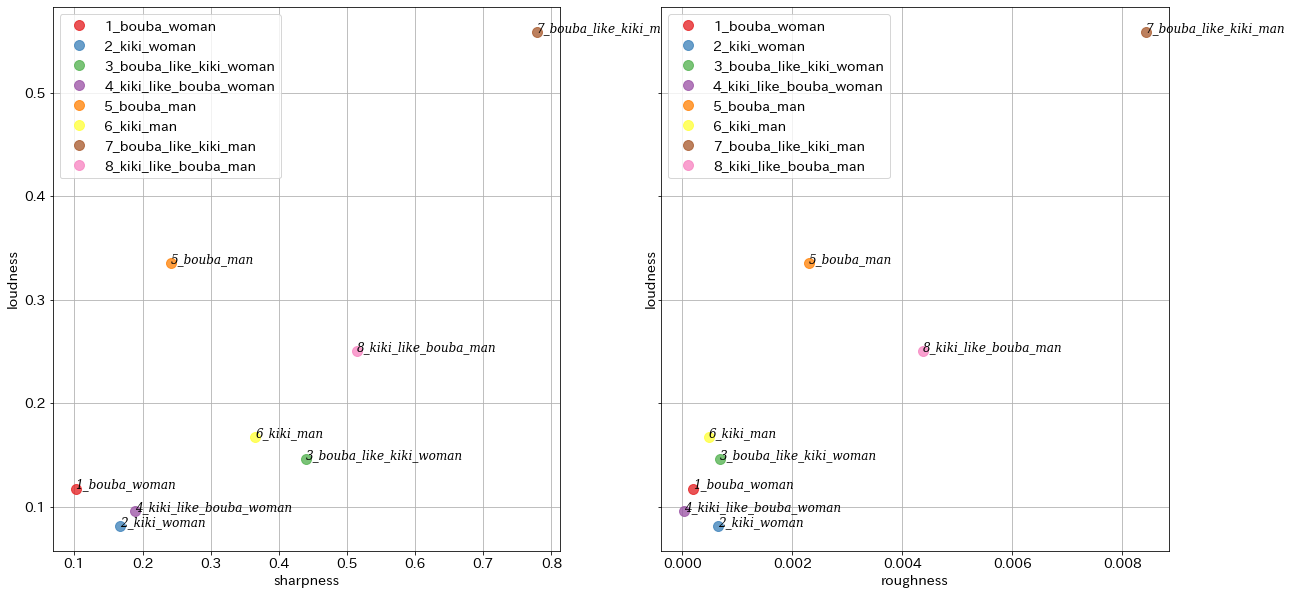

In [60]:

colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']

y_feature = "loudness"
x_features = ["sharpness", "roughness"]

plt.rcParams["font.size"] = 14

dfp = df_data.copy()

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
axs = ax.flatten()

for ax_no in [0, 1]:
    
    plt.sca(axs[ax_no])
    
    for i, df1 in dfp.iterrows():

        wav_name = df1["wav_name"]
        x_feature= x_features[ax_no]
        x = df1[x_feature]
        y = df1[y_feature]
        c = colorlist[i]
        
        plt.plot(x, y , "o", markersize=10, color=c, label=wav_name, alpha=0.75)
        plt.text(x, y, wav_name, color="#000000",
                                 fontfamily="serif",
                                 #fontweight="bold",
                                 fontstyle="italic",
                                 fontsize=12)

    plt.legend()
    plt.ylabel(y_feature)
    plt.xlabel(x_feature)
    plt.grid()

plt.savefig(Path(EXP_DIR) / f"{y_feature}-vs-{x_feature}.jpg")



